In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakeTrace, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


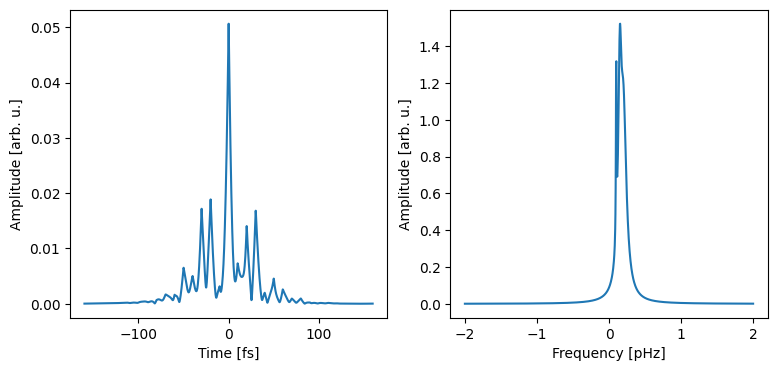

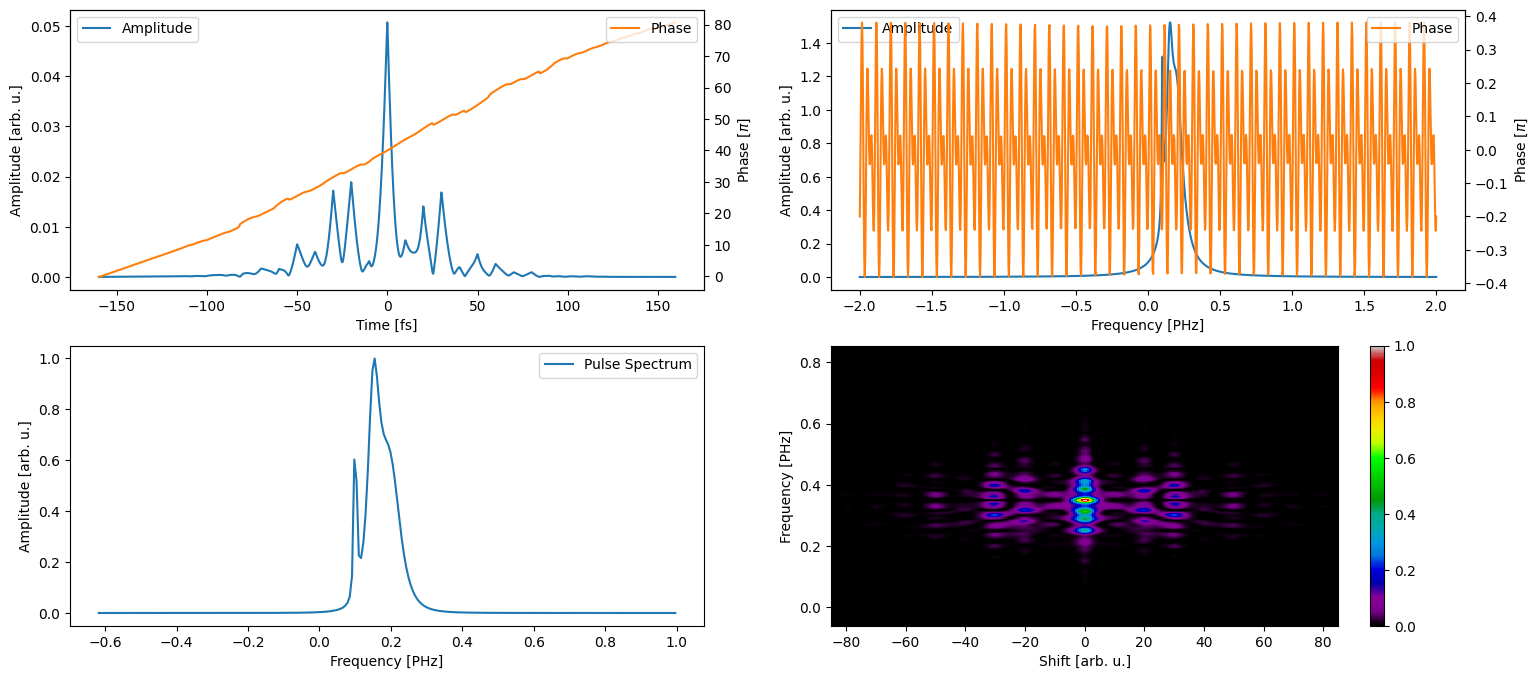

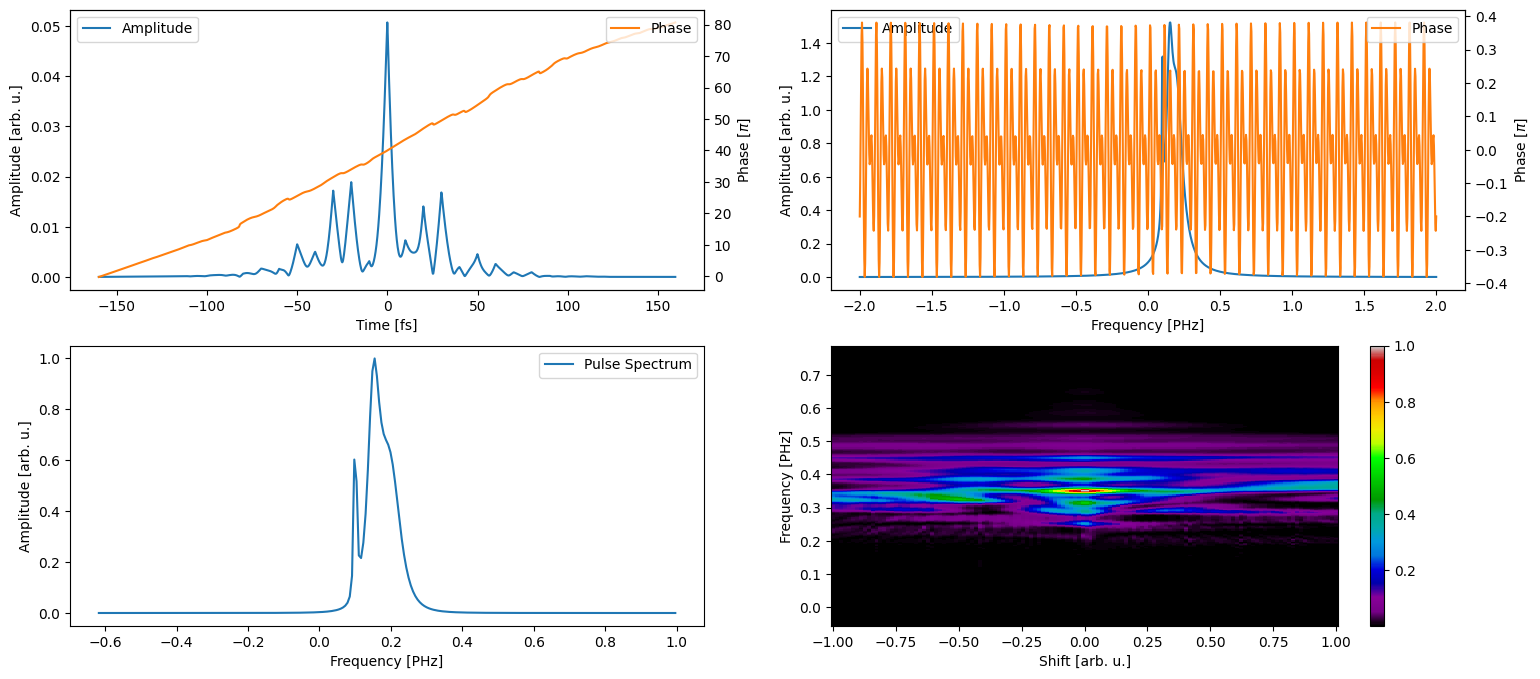

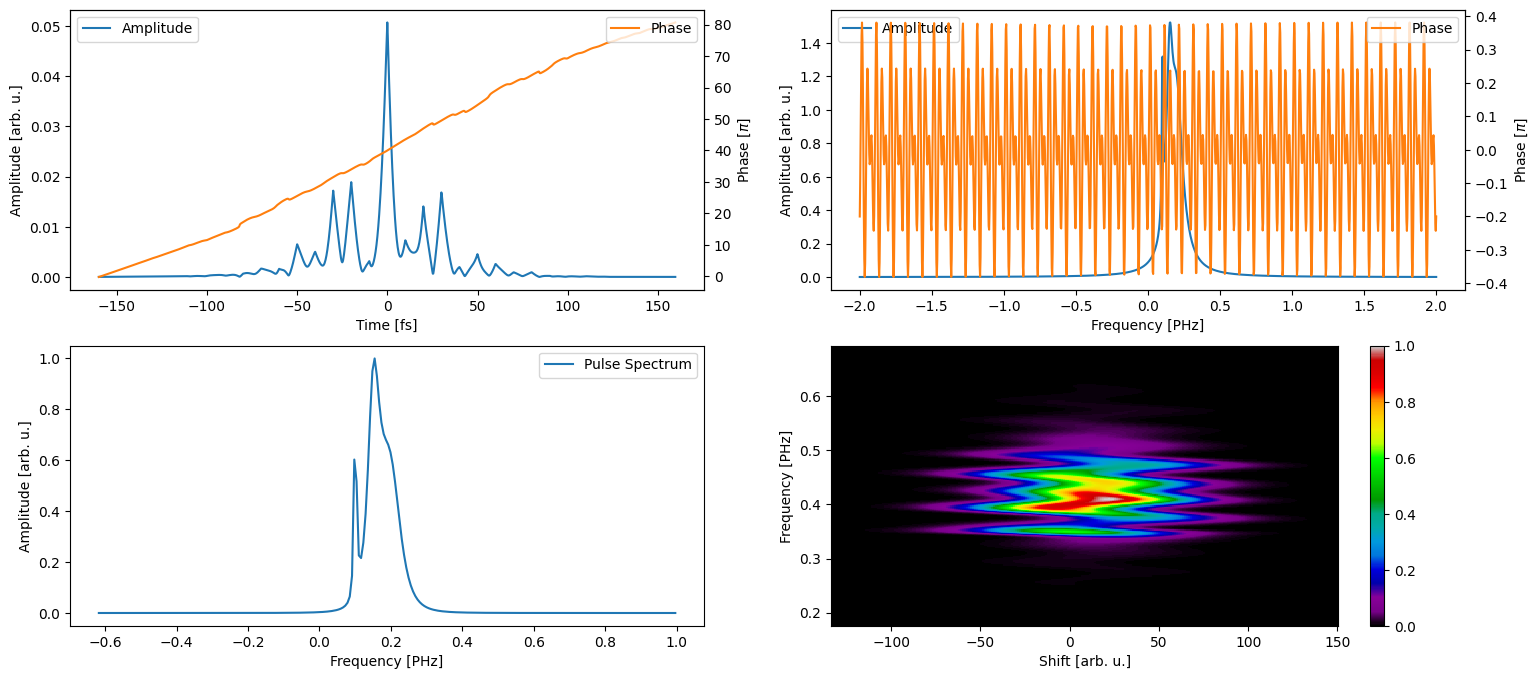

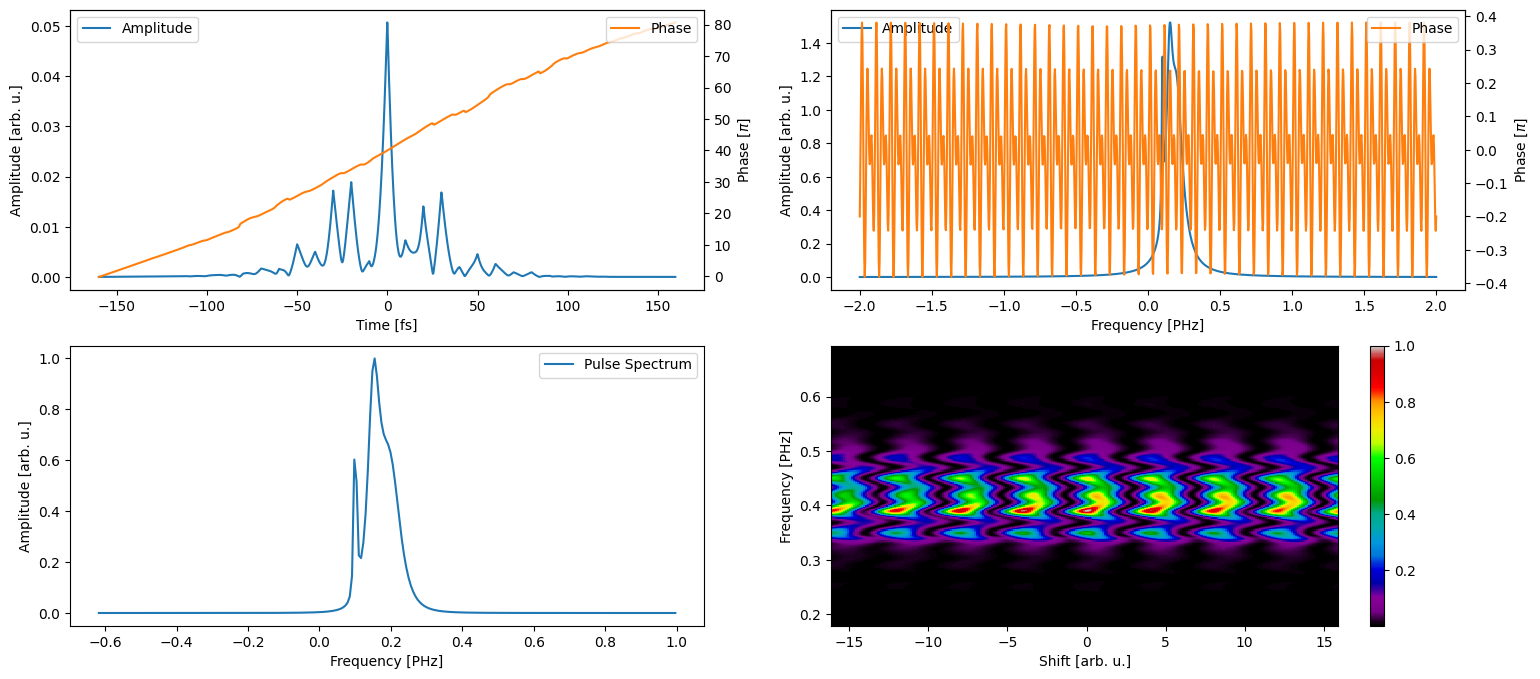

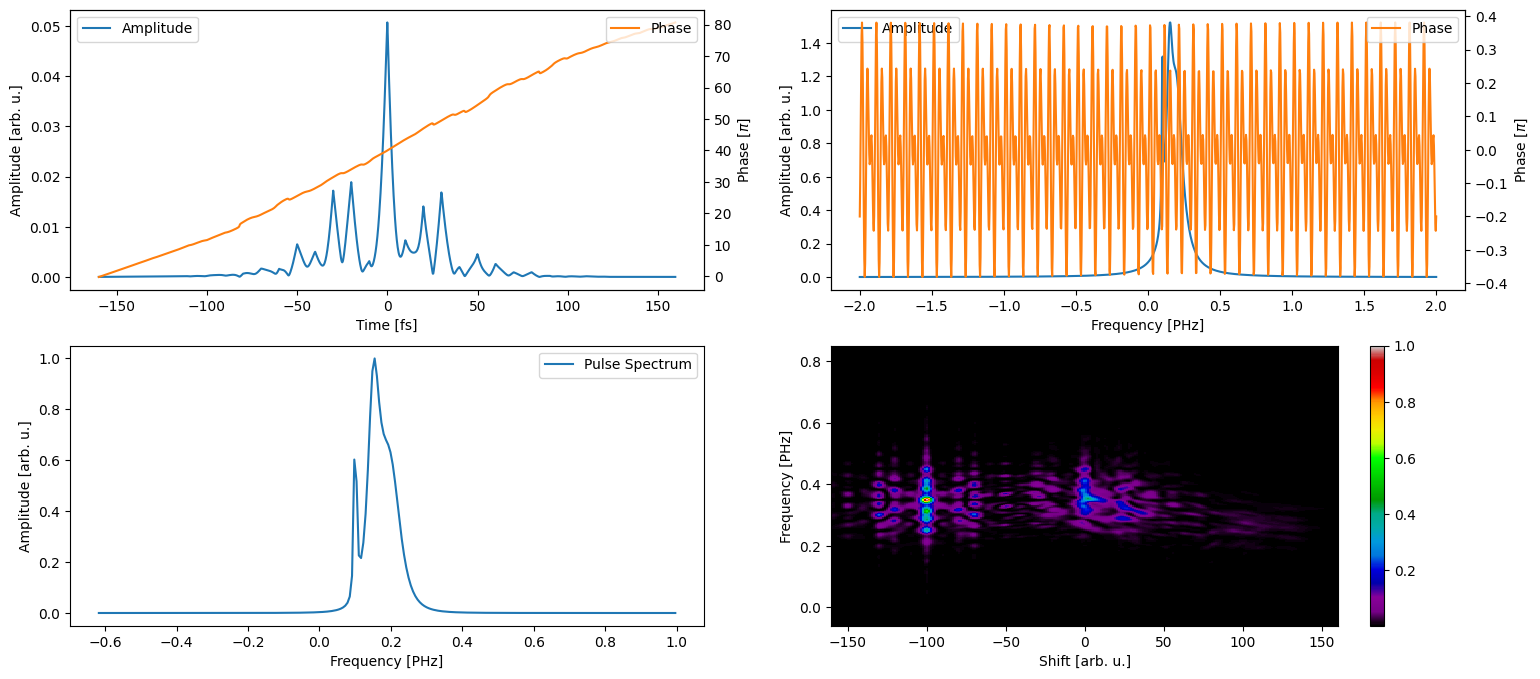

In [51]:
from src.simulate_trace import MakeTrace, apply_noise
from src.simulate_trace import GaussianAmplitude, LorentzianAmplitude, PolynomialPhase, SinusoidalPhase, RandomPhase, MultiPulse
import jax.numpy as jnp

amp0 = GaussianAmplitude((1,1,1), (0.1,0.15,0.2), (0.01,0.05,0.1), (1,1,1))
amp1 = LorentzianAmplitude((1,1,1), (0.1,0.15,0.2), (0.01,0.05,0.1), (1,1,1))
phase0 = PolynomialPhase(None, (0,0,50,-25))
phase1 = SinusoidalPhase((0.1,0.1), (0.1,0.2), (20,30), (0, jnp.pi/2))
phase2 = RandomPhase()

pulse = MultiPulse(("G","G","L"), (1,1,1), (50,50), (25,25,25), (0.25,0.25,0.3), (1,2,3), (phase1, phase2, phase2))


mp = MakeTrace(N=128*10, f_max=2)

time, pulse_t, frequency, pulse_f = mp.generate_pulse((amp1,phase1))
#time, pulse_t, frequency, pulse_f = mp.generate_pulse(pulse) # in case of MultiPulse
mp.plot_envelopes()



delay, frequency_trace, trace, spectra = mp.generate_frog(time, frequency, pulse_t, pulse_f, "shg")



import refractiveindex
phase_type = "material"
parameters = refractiveindex.RefractiveIndexMaterial(shelf="main", book="SiO2", page="Malitson")
z_arr = jnp.linspace(-1,1,128)

z_arr, frequency_trace, trace, spectra = mp.generate_chirpscan(time, frequency, pulse_t, pulse_f, "shg", z_arr, phase_type, parameters)



noisy_trace = apply_noise(trace, (0.1,0.1), additive_noise=True, multiplicative_noise=True)




from src import spectral_filter_funcs
spectral_filter = spectral_filter_funcs.get_filter("gaussian", frequency, (1,0.25,0.01,1))
delay, frequency_trace, trace, spectra = mp.generate_tdp(time, frequency, pulse_t, pulse_f, "shg", spectral_filter)



spectral_filter1 = spectral_filter_funcs.get_filter("lorentzian", frequency, (1,0.24,0.005,1))
spectral_filter2 = spectral_filter_funcs.get_filter("lorentzian", frequency, (1,0.25,0.005,1))
delay, frequency_trace, trace, spectra = mp.generate_2dsi(time, frequency, pulse_t, pulse_f, "shg", spectral_filter1, spectral_filter2,
                                                          scale_time_range=0.1)



delay, frequency_trace, trace, spectra = mp.generate_vampire(time, frequency, pulse_t, pulse_f, "shg", 
                                                             tau_interferometer=100, material_thickness=1)

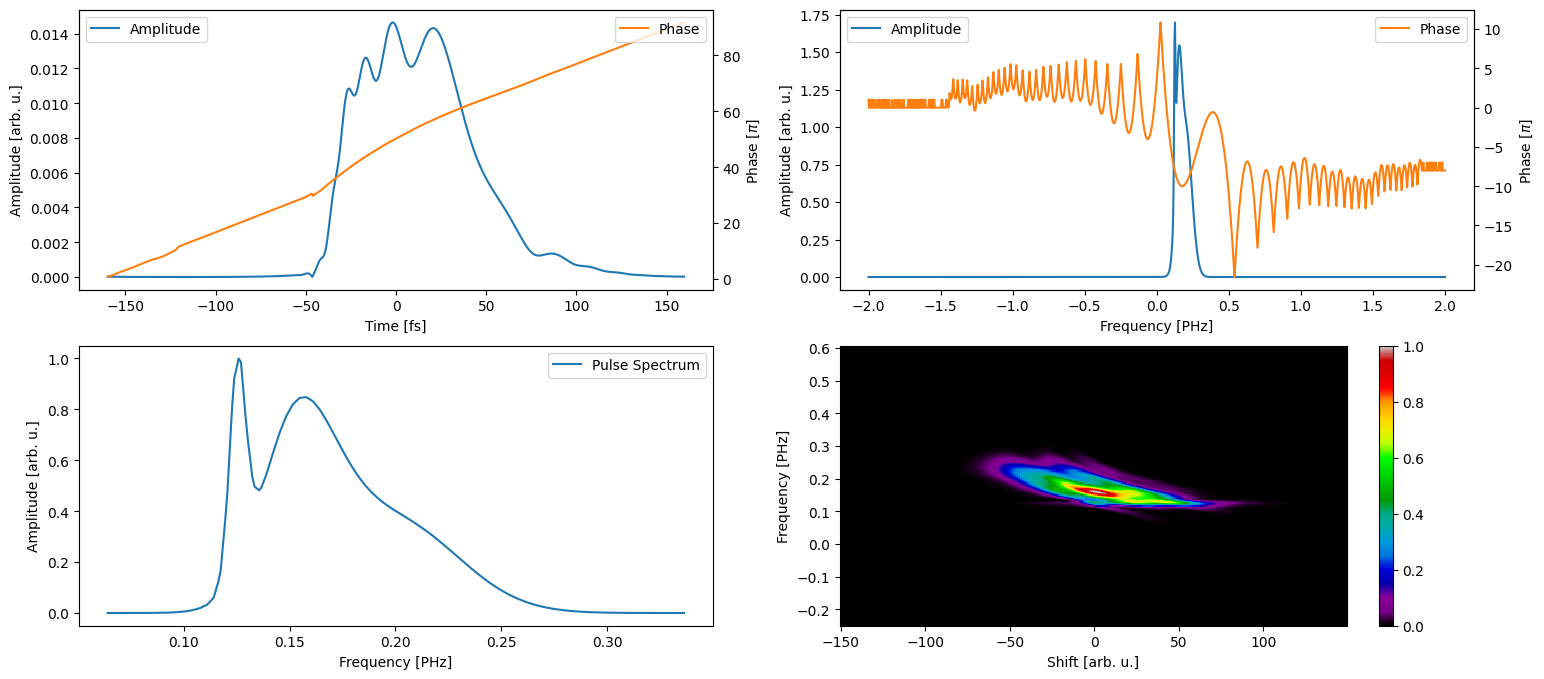

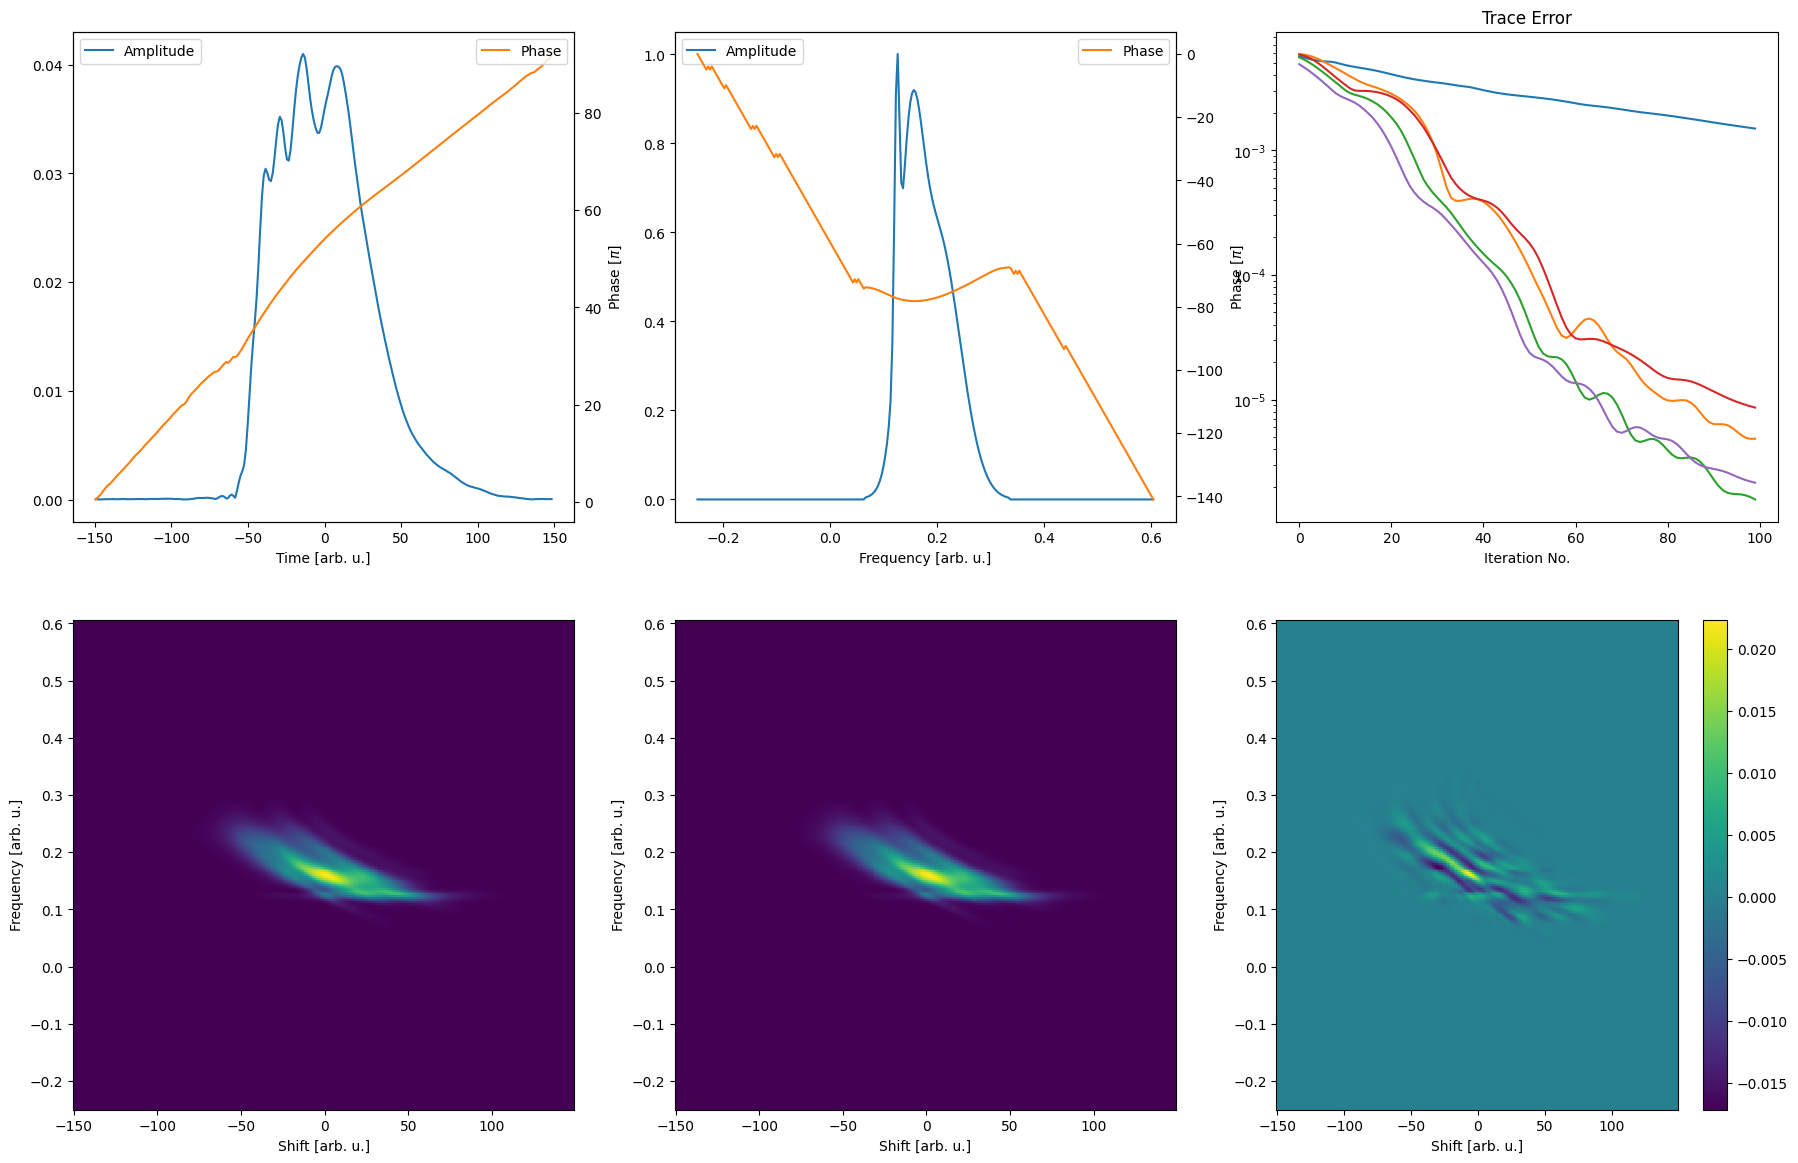

In [ ]:
from src.simulate_trace import MakeTrace
from src.simulate_trace import GaussianAmplitude, PolynomialPhase
import jax.numpy as jnp

amp0 = GaussianAmplitude((1,1,1), (0.125,0.15,0.2), (0.01,0.05,0.1), (1,1,1))
phase0 = PolynomialPhase(None, (0,0,50,-25))


mp = MakeTrace(N=128*10, f_max=2)
time, pulse_t, frequency, pulse_f = mp.generate_pulse((amp0,phase0))

delay_inp = jnp.linspace(-150,150,256)
delay, frequency_trace, trace, spectra = mp.generate_frog(time, frequency, pulse_t, pulse_f, "pg", delay_inp,
                                                          interpolate_fft_conform=True)







In [ ]:
idx0, idx1 = jnp.argmin(jnp.abs(pie.time-pie.tau_arr[0])), jnp.argmin(jnp.abs(pie.time-pie.tau_arr[-1]))
population.pulse = population.pulse.at[:,:idx0].set(0.0)
population.pulse = population.pulse.at[:,idx1:].set(0.0)

In [23]:
population.pulse[0]

Array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
      

In [22]:
idx0, idx1

(Array(8, dtype=int32), Array(248, dtype=int32))

In [ ]:
population.pulse = population.pulse.at[:idx0,:].set(0.0)
population.pulse = population.pulse.at[idx1:,:].set(0.0)

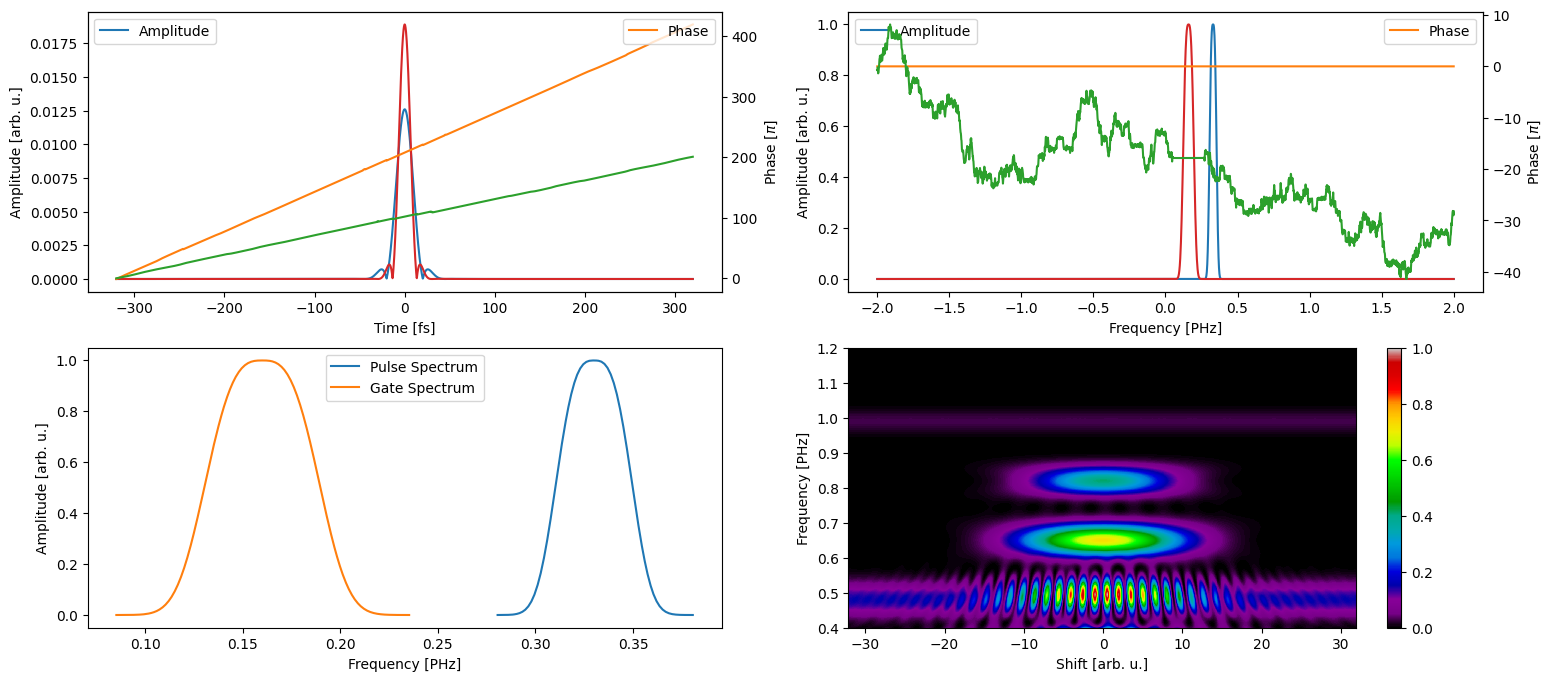

In [ ]:
pulse_maker = MakeTrace(N=128*20, Delta_f=2)

phase = PolynomialPhase(None, (0,0,0,0))
amp = GaussianAmplitude((1), (0.33), (0.05), (1.5))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))


input_pulses = pulse_maker.pulses


# phase = PolynomialPhase(0.3, (0,0,30,0))
# amp = GaussianAmplitude((1,1), (0.225,0.2), (0.01,0.025), (1,1))
phase = PolynomialPhase(None, (0.5,0,0,0))
amp = GaussianAmplitude((1), (0.16), (0.075), (1.5))
_, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "3hg", cross_correlation=True, interferometric=True,
                                                          gate=(frequency_gate, pulse_f_gate), real_fields=True, interpolate_fft_conform=False,
                                                          N=128*8, scale_time_range=0.1, plot_stuff=True, cut_off_val=0.0001, frequency_range=(0.4,1.2))

In [ ]:
trace_0 = jnp.copy(trace)

In [ ]:
trace_1 = jnp.copy(trace)

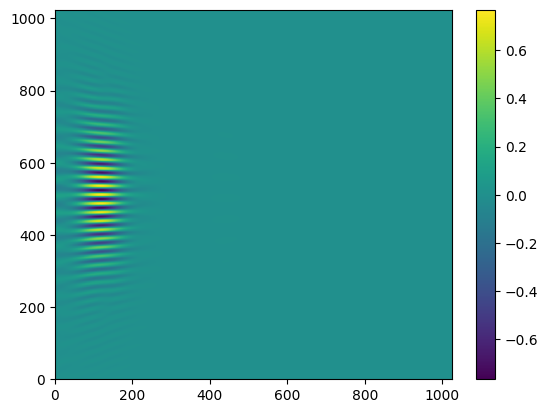

In [ ]:
plt.pcolormesh(trace_0-trace_1)
plt.colorbar()